In [127]:
import pandas as pd
import numpy as np 
import seaborn as sns
import glob, os
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
#path = "C:\\Users\\Mohamed\\MS BGD\\fil_rouge_lepoint\\Predictions éléctions\\PRESIDENTIELLES_1965-2012-csv\\" 
#path_to_csv = "C:\\Users\\Mohamed\\git\\Elections\\Analyses\\Jointure des tables\\"
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

## Préparation de la base

In [3]:
dft11 = pd.read_csv("la_base.csv", encoding="latin1")

In [4]:
dft11.columns

Index(['d?partement', 'code', 'Ann?e', 'taux_Blancs et nuls', 'taux_xdroite',
       'taux_gauche', 'taux_Abstention', 'taux_xgauche', 'taux_centre',
       'taux_vert', 'taux_droite', 'depart_frontalier', 'depart_OM',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Total', 'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dissident', 'Supe

In [5]:
dft11.columns

Index(['d?partement', 'code', 'Ann?e', 'taux_Blancs et nuls', 'taux_xdroite',
       'taux_gauche', 'taux_Abstention', 'taux_xgauche', 'taux_centre',
       'taux_vert', 'taux_droite', 'depart_frontalier', 'depart_OM',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Total', 'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dissident', 'Supe

In [6]:
dft11["taux_bgauche"] = dft11['taux_xgauche']+ dft11['taux_gauche'] + dft11['taux_vert']

In [7]:
dft11.head()

,d?partement,code,Ann?e,taux_Blancs et nuls,taux_xdroite,taux_gauche,taux_Abstention,taux_xgauche,taux_centre,taux_vert,...,importations,subventions,conjoncture travaux publics-opinions sur le carnet de commandes,capacit? epargne actuelle (augmentation moins diminution),opportunite epargner(favorable moins favorable),capacite epargne future(am?lioration moins deterioration),densit?_m?decins,consommation menages - electricite,nombre de logement vacant,taux_bgauche
0,AIN,1,1981.0,1.604750,0.000000,27.982284,27.940015,14.888346,31.660729,4.226724,...,37565.00,-1797.75,-48.00,8.333333,-31.916667,-18.666667,84.34,21650,NaN,47.097355
1,AIN,1,1988.0,1.879541,16.041776,31.377812,23.877703,8.171024,21.290640,4.065072,...,51173.75,-3613.50,1.00,4.666667,6.333333,-9.833333,108.59,41112,1891.0,43.613907
2,AIN,1,1995.0,3.155125,19.751523,20.553725,25.807688,11.073277,19.814177,3.932995,...,68988.00,-3850.00,-47.25,9.166667,28.500000,-10.166667,127.35,56611,1949.0,35.559996
3,AIN,1,2002.0,3.540833,25.246258,20.716478,37.217333,11.320086,8.927322,7.374661,...,109924.50,-4745.00,-28.00,11.833333,24.750000,-3.250000,127.56,77698,1954.0,39.411224
4,AIN,1,2007.0,1.344946,12.233715,20.826783,16.571575,6.279643,19.637678,3.020936,...,139894.25,-3140.75,27.75,5.250000,25.583333,-8.083333,123.76,95093,2014.0,30.127362


In [8]:
dft11["taux_sortie_sans_bloc"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==1981,"taux_centre"]
dft11.ix[dft11["Ann?e"]==1988,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==1988,"taux_gauche"]
dft11.ix[dft11["Ann?e"]==1995,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==1995,"taux_gauche"]
dft11.ix[dft11["Ann?e"]==2002,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==2002,"taux_droite"]
dft11.ix[dft11["Ann?e"]==2007,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==2007,"taux_droite"]
dft11.ix[dft11["Ann?e"]==2012,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==2012,"taux_droite"]

In [9]:
dft11["taux_sortie_avec_bloc"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==1981,"taux_centre"]
dft11.ix[dft11["Ann?e"]==1988,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==1988,"taux_gauche"]+\
dft11.ix[dft11["Ann?e"]==1988,"taux_xgauche"] + dft11.ix[dft11["Ann?e"]==1988,"taux_vert"]
        
dft11.ix[dft11["Ann?e"]==1995,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==1995,"taux_gauche"]+\
dft11.ix[dft11["Ann?e"]==1995,"taux_xgauche"] + dft11.ix[dft11["Ann?e"]==1995,"taux_vert"]

dft11.ix[dft11["Ann?e"]==2002,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==2002,"taux_droite"]
dft11.ix[dft11["Ann?e"]==2007,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==2007,"taux_droite"]
dft11.ix[dft11["Ann?e"]==2012,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==2012,"taux_droite"]


In [12]:
#Taux_supp_moyenne sortant
#Popularité sortant 

dft11["ecart_pop"] = dft11["pop_president"] - dft11["pop_premier_ministre"] 
dft11["pop_exec"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1981,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==1988,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1988,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==2012,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2012,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==1995,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1995,"pop_premier_ministre"].iloc[0]
dft11.ix[dft11["Ann?e"]==2002,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2002,"pop_premier_ministre"].iloc[0]
dft11.ix[dft11["Ann?e"]==2007,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2007,"pop_premier_ministre"].iloc[0]

dft11.ix[dft11["Ann?e"]==1981,"pop_xdroite"] = dft11.ix[dft11["Ann?e"]==1988,"pop_xdroite"].iloc[0]
dft11.ix[dft11["Ann?e"]==1981,"pop_verts"] = dft11.ix[dft11["Ann?e"]==1995,"pop_verts"].iloc[0]
dft11.ix[dft11["Ann?e"]==1988,"pop_verts"] = dft11.ix[dft11["Ann?e"]==1995,"pop_verts"].iloc[0]

dft11.ix[dft11["Ann?e"]==1981,"nombre de logement vacant"] = 1891.

In [82]:
def create_train_and_test(target, dft11):
    dft12 = dft11.drop(["code",'taux_Abstention', 'taux_Blancs et nuls', 'taux_droite', 'taux_xgauche',\
                    'taux_vert','taux_centre', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date","taux_Abstention_sup_moyenne"], axis=1)
    
    dft12["Date"] = dft12["Ann?e"] - 1981
    
    list_dell = ["Ann?e","d?partement","taux_bgauche","taux_sortie_sans_bloc",
                "taux_sortie_avec_bloc","taux_gauche", 'taux_xdroite']

    
    df_train = dft12[dft12["Ann?e"]!=2012]

    df_test = dft12[dft12["Ann?e"]==2012]
    
    df_train_x = df_train.drop(list_dell, axis=1)
    df_train_y = df_train[target]
    df_test_x = df_test.drop(list_dell, axis=1)
    df_test_y = df_test[target]
    
    return df_train_x, df_train_y, df_test_x, df_test_y

In [83]:
def target_and_predict(target, dft11, estimator, importance_features=False):

    df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test(target, dft11)
   
    svr.fit(df_train_x, df_train_y)
    print("Avec l'estimateur %s" % str(estimator))
    print("Approche %s" % target)
    print("Nb itération : %s" % svr.n_iter_)
    print("MSE test : %s" % metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
    print("MAE test : %s" % metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
    print("R2 test : %s " % svr.score(df_test_x, df_test_y))

    if importance_features==True :
        print("\n")
        print("Features à garder")
        vec_features = zip(svr.coef_, df_train_x.columns)
        vec_features = sorted(vec_features)

        for i in range(len(vec_features)):
            if vec_features[i][0]!=0:
                print( vec_features[i][0],  vec_features[i][1])

    print("\n")
    

## Prédiction Sortant/ ou gauche

In [84]:
svr = linear_model.Lasso(alpha=0.1, normalize=True, max_iter=5000, random_state=42)
target_and_predict("taux_gauche",dft11, svr)
target_and_predict("taux_bgauche",dft11, svr)
target_and_predict("taux_sortie_sans_bloc",dft11, svr)
target_and_predict("taux_sortie_avec_bloc",dft11, svr)

Avec l'estimateur Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_gauche
Nb itération : 20
MSE test : 18.6143848196
MAE test : 3.37192264221
R2 test : -0.0150222115684 


Avec l'estimateur Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_bgauche
Nb itération : 28
MSE test : 37.0697634355
MAE test : 4.90479702662
R2 test : -0.14169904631 


Avec l'estimateur Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_sortie_sans_bloc
Nb itération : 11
MSE test : 15.1239430387
MAE test : 3.22516695987
R2 test : -0.148447605949 


Avec l'estimateur

## Prédiction Xdroite

In [85]:
svr = linear_model.Lasso(alpha=0.01, normalize=True, max_iter=5000, random_state=42)
target_and_predict("taux_xdroite",dft11, svr, True)

Avec l'estimateur Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_xdroite
Nb itération : 773
MSE test : 24.735884349
MAE test : 4.15097208772
R2 test : -0.269190490869 


Features à garder
-6.02732088033 droite_au_pouvoir
-0.278220374465 taux_droite_sup_moyenne
-0.00101490394711 subventions
0.0205835453482 pop_centre
0.0789344568171 persistance_centre_droite
0.0901915856578 taux_chomage
0.370528357584 capacite epargne future(am?lioration moins deterioration)
0.398855410231 Dissident
0.7793679783 depart_frontalier
2.03336090712 taux_xdroite_sup_moyenne




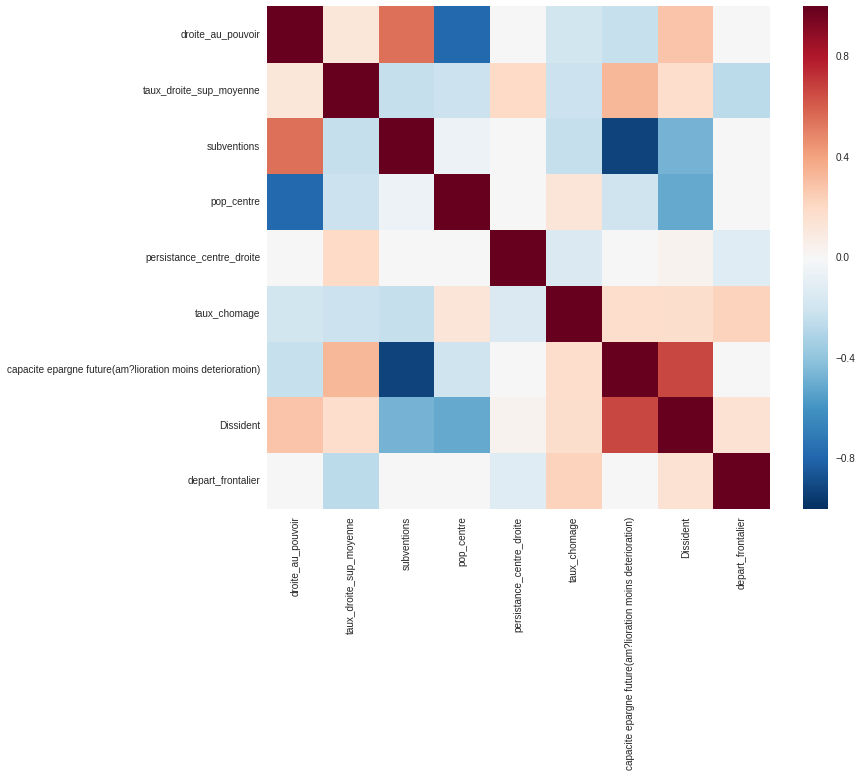

In [81]:
liste_features = ["droite_au_pouvoir","taux_droite_sup_moyenne","subventions","pop_centre",
                 "persistance_centre_droite","taux_chomage","capacite epargne future(am?lioration moins deterioration)",
                 "Dissident","depart_frontalier"]
xdroite_mat = dft12.ix[:, liste_features].corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(xdroite_mat, vmax=1, square=True)
plt.show()

In [137]:
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11)
skb = SelectKBest(f_regression, k=10)
skb.fit(df_train_x, df_train_y)
skb_result = sorted(zip(skb.scores_, skb.pvalues_ ,df_train_x.columns))

[ print(skb_result[i]) for i in skb.get_support(True)]

(3.2515331083258938, 0.071986288375347318, 'pres_gauche')
(16.319435523681136, 6.2336612054780983e-05, 'pres_droite')
(17.403427428764147, 3.5908078324002261e-05, 'pop_xdroite')
(21.427544209764193, 4.7406204764373978e-06, '40-59ans')
(25.403981314962195, 6.6081333851371626e-07, 'taux_vert_sup_moyenne')
(157.92226621651366, 1.7040648694634197e-31, 'pop_droite')
(187.2810582852857, 3.31138387496306e-36, 'pop_gauche')
(211.33290024571781, 6.5379495154062283e-40, 'Date')
(264.80295786236172, 1.0686295723424435e-47, 'taux_xdroite_sup_moyenne')
(1244.3514929467551, 3.822979197725711e-135, 'subventions')


[None, None, None, None, None, None, None, None, None, None]

In [138]:
svc = LinearRegression()
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)
rfe.fit(df_train_x, df_train_y)
rfe_result = sorted(zip(rfe.ranking_ ,df_train_x.columns))
[ print(rfe_result[i]) for i in rfe.get_support(True)]

(1, 'Date')
(8, '40-59ans')
(17, '75+ans')
(34, 'pop_xgauche')
(35, 'consommation menages - electricite')
(36, 'importations')
(40, 'pop_verts')
(41, 'droite_au_pouvoir')
(42, 'Superficie ')
(43, '0-19ans')


[None, None, None, None, None, None, None, None, None, None]

In [145]:
sfm = SelectFromModel(svc, threshold=0.4)
sfm.fit(df_train_x, df_train_y)
print(df_train_x.columns[sfm.get_support(True)])
print("\n")
dtr = DecisionTreeRegressor()
sfm = SelectFromModel(dtr, threshold=0.1)
sfm.fit(df_train_x, df_train_y)
print(df_train_x.columns[sfm.get_support(True)])

Index(['depart_frontalier', 'depart_CORSE', '40-59ans', '60-74ans',
       'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'taux_droite_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'Dissident', 'persistance_gauche',
       'persistance_droite', 'persistance_centre_droite', 'pres_centre',
       'pres_droite', 'pres_gauche', 'pres_xgauche'],
      dtype='object')


Index(['taux_xdroite_sup_moyenne', 'subventions'], dtype='object')


## Plusieurs test

In [37]:
#Export de la table de train pour un prune d'arbre sur R
#df_export = pd.concat([df_train_x, df_train_y], axis=1)
df_train.to_csv("base_train_gauche.csv",index=False)

df_export = pd.concat([df_test_x, df_test_y], axis=1)
df_test.to_csv("base_test_gauche.csv",index=False)

In [19]:
name_columns = df_train_x.columns

In [10]:
#ss = StandardScaler()
#df_train_x = ss.fit_transform(df_train_x)
#df_test_x = ss.transform(df_test_x)

In [11]:
svr = LinearSVR()
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))

svr.score(df_test_x, df_test_y)

3.95304008746
1.41192195687


0.88042516497972223

In [23]:
svr = LinearRegression()
svr.fit(df_train_x, df_train_y)
print("MSE test : %s" % metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print("MAE test : %s" % metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))

for i in range(len(svr.coef_)):
    print(svr.coef_[i], df_train.drop("taux_gauche", axis=1).columns[i])

print("R2 test : %s " % svr.score(df_test_x, df_test_y))


MSE test : 793.892404365
MAE test : 28.1199629059
-0.31789826163 d?partement
0.97874980605 Ann?e
-2.20846262682e-06 depart_frontalier
-0.437363636241 depart_CORSE
-0.502511083024 0-19ans
-0.205205864103 20-39ans
-0.151775572621 40-59ans
0.784499783161 60-74ans
0.49011714813 75+ans
-0.828691563529 Naissances domicili?es par d?partement
-0.294112719774 Nombre total de mariages domicili?s
-0.163843216722 D?c?s domicili?s par d?partement
-0.15305605254 var_chomage_annee
-0.240554829473 taux_chomage
0.58144255953 taux_centre_sup_moyenne
-0.080280734876 taux_droite_sup_moyenne
-0.195653739041 taux_gauche_sup_moyenne
-0.333630592432 taux_vert_sup_moyenne
0.184437760506 taux_xdroite_sup_moyenne
-0.201821450007 taux_xgauche_sup_moyenne
-0.000295455871121 taux_Abstention_sup_moyenne
0.000945128653329 taux_Blancs et nuls_sup_moyenne
-0.00684895376797 pop_verts
0.00700923788425 pop_centre
-0.00534204686138 pop_droite
-0.0136065755798 pop_gauche
-0.0136262296689 pop_xdroite
-0.000901648856203 pop_x

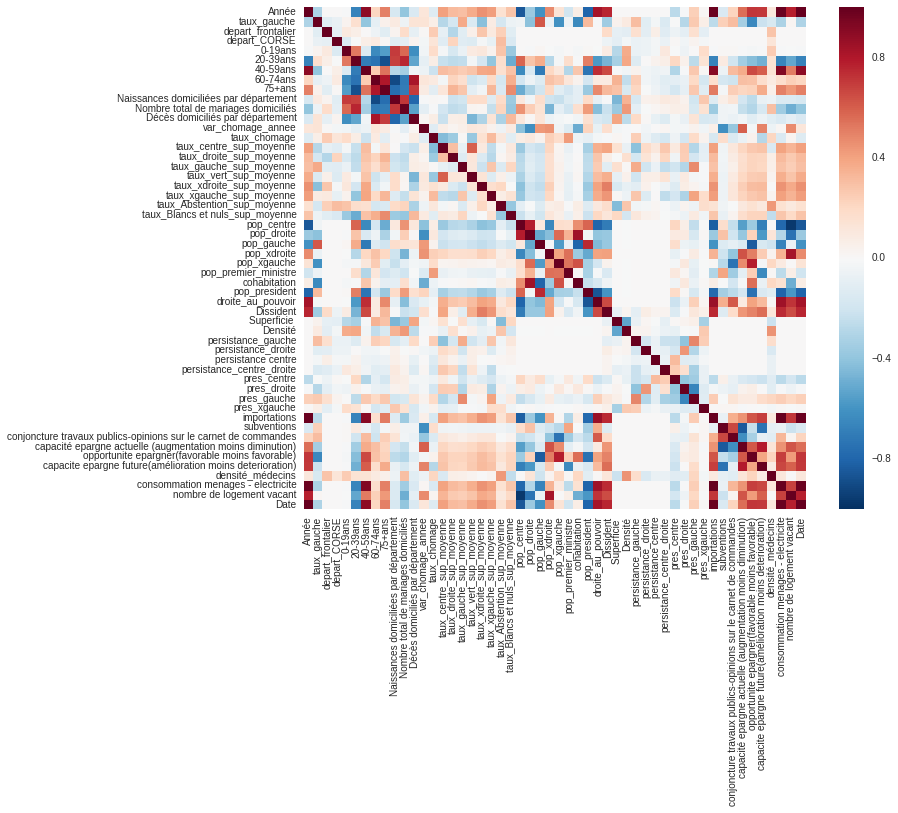

In [13]:
corrmat = dft12.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

In [24]:
Counter(df_train["pop_president"])

Counter({25: 96, 38: 96, 50: 96, 58: 96})

In [14]:
# df_train_x1 = df_train_x[["var_chomage_annee", "taux_gauche_sup_moyenne", "40-59ans"]]
# df_test_x1 = df_test_x[["var_chomage_annee", "taux_gauche_sup_moyenne", "40-59ans"]]
# print(df_test_x1.shape, df_train_x1.shape)
X = sm.add_constant(df_train_x)
X_test = sm.add_constant(df_test_x)

model = sm.OLS(df_train_y, X)
results = model.fit()
print(metrics.r2_score(results.predict(X_test), df_test_y))

#print(metrics.r2_score(model.predict(df_test_x), df_test_y))
print(results.summary())

0.881263171063
                            OLS Regression Results                            
Dep. Variable:            taux_gauche   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     83.74
Date:                Fri, 24 Mar 2017   Prob (F-statistic):          1.22e-147
Time:                        16:07:53   Log-Likelihood:                -785.88
No. Observations:                 384   AIC:                             1644.
Df Residuals:                     348   BIC:                             1786.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         26.5437      0.100    2

In [70]:
svr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
print(metrics.r2_score(df_test_y, svr.predict(df_test_x)))
print("\n")
for i in range(len(svr.feature_importances_)):
    print(svr.feature_importances_[i], df_train.drop("taux_gauche", axis=1).columns[i])



18.6874038783
3.5455792847
-0.0190038616276


0.0 département
0.0 Année
0.0 depart_frontalier
0.0 depart_CORSE
0.00101966709785 0-19ans
0.0 20-39ans
0.0 40-59ans
0.00707695465992 60-74ans
0.00198005078727 75+ans
0.0 Naissances domiciliées par département
0.00948809506211 Nombre total de mariages domiciliés
0.0 Décès domiciliés par département
0.00478662267849 var_chomage_annee
0.0 taux_chomage
0.185276146829 taux_centre_sup_moyenne
0.0 taux_droite_sup_moyenne
0.0120323229971 taux_gauche_sup_moyenne
0.00754492730986 taux_vert_sup_moyenne
0.0 taux_xdroite_sup_moyenne
0.00790742707964 taux_xgauche_sup_moyenne
0.0 taux_Abstention_sup_moyenne
0.0 taux_Blancs et nuls_sup_moyenne
0.0 pop_centre
0.0 pop_droite
0.0 pop_gauche
0.00334198100824 pop_xdroite
0.0 pop_xgauche
0.632393604329 pop_premier_ministre
0.0 cohabitation
0.0831879152264 pop_president
0.0123979395566 droite_au_pouvoir
0.00624219153921 Dissident
0.00785856439627 Superficie 
0.0 Densité
0.0 persistance_gauche
0.0 persistance_droi

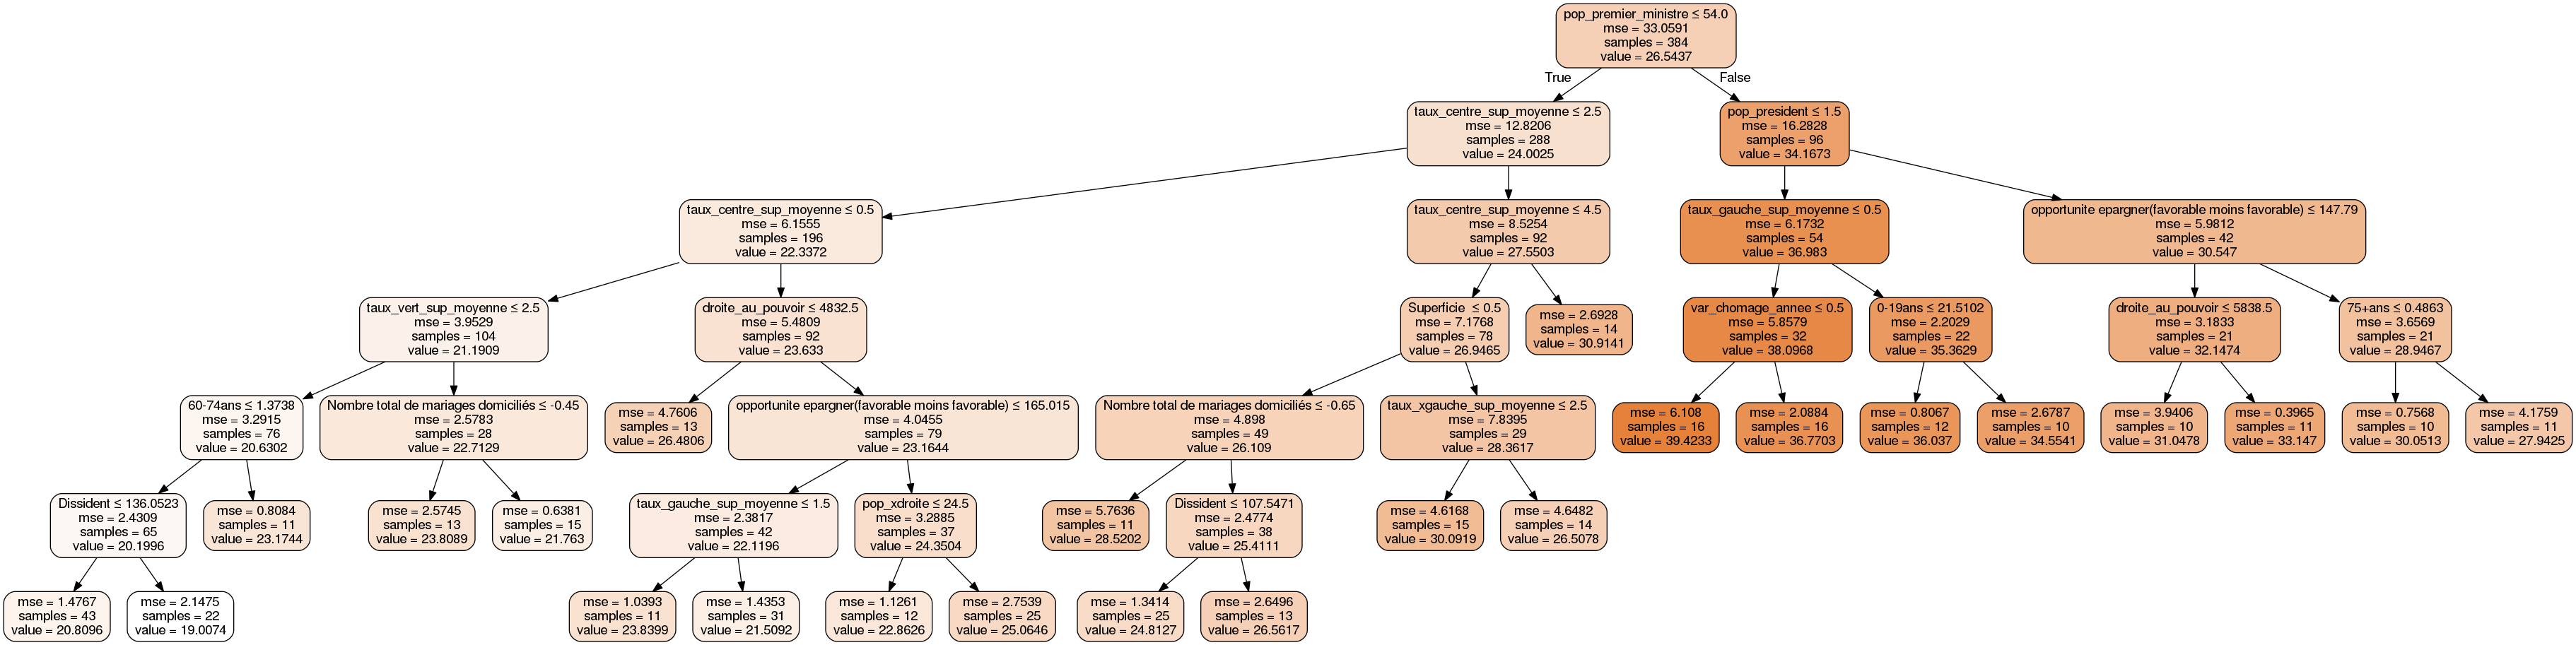

In [71]:
dot_data = tree.export_graphviz(svr, out_file=None,
                         feature_names=name_columns,    
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [12]:
graph.write_pdf("decision_tree_split5.pdf")

True

In [15]:
df_train.columns

Index(['d?partement', 'Ann?e', 'taux_gauche', 'depart_frontalier',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'pop_centre', 'pop_droite', 'pop_gauche', 'pop_xgauche',
       'pop_premier_ministre', 'cohabitation', 'pop_president',
       'droite_au_pouvoir', 'Dissident', 'Superficie ', 'Densit?',
       'persistance_gauche', 'persistance_droite', 'persistance centre',
       'persistance_centre_droite', 'pres_centre', 'pres_droite',
       'pres_gauche', 'pres_xgauche', 'importations', 'subventions',
       'conjoncture

In [42]:
liste_drop = ["taux_sortie_sans_bloc","taux_sortie_avec_bloc","taux_bgauche","Ann?e","d?partement","taux_gauche"]
df_train_x = df_train.drop(liste_drop, axis=1)
df_train_y = df_train["taux_sortie_sans_bloc"]
df_test_x = df_test.drop(liste_drop, axis=1)
df_test_y = df_test["taux_sortie_sans_bloc"]

In [24]:
svr = linear_model.Lasso(alpha=0.01)

svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
print(metrics.r2_score(df_test_y, svr.predict(df_test_x)))

for i in range(len(svr.coef_)):
    print(svr.coef_[i], df_test_x.columns[i])
    
print(svr.score(df_test_x, df_test_y))

62.5220152214
7.71689575845
-2.40925766694
-0.325380938227 depart_frontalier
0.0 depart_CORSE
-2.14384078419e-06 0-19ans
-0.344319019793 20-39ans
-0.458340809078 40-59ans
-0.212506496817 60-74ans
-0.179703733211 75+ans
0.0 Naissances domicili?es par d?partement
0.0 Nombre total de mariages domicili?s
-0.0 D?c?s domicili?s par d?partement
-0.0836317546605 var_chomage_annee
-0.0925629701297 taux_chomage
-0.146443265677 taux_centre_sup_moyenne
-0.174229903904 taux_droite_sup_moyenne
0.601319216407 taux_gauche_sup_moyenne
-0.0539218923109 taux_vert_sup_moyenne
-0.190840954174 taux_xdroite_sup_moyenne
-0.332616627025 taux_xgauche_sup_moyenne
0.180999784909 taux_Abstention_sup_moyenne
-0.186704591334 taux_Blancs et nuls_sup_moyenne
0.0 pop_verts
0.39490523781 pop_centre
0.0 pop_droite
0.0512509669927 pop_gauche
0.0 pop_xdroite
-0.481597171344 pop_xgauche
0.0 pop_premier_ministre
-0.0 cohabitation
0.0363884311202 pop_president
-0.0 droite_au_pouvoir
-0.0313523164968 Dissident
-1.70429144461e-

/home/brehelin/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [58]:
var_importance = SelectKBest(f_regression, k=10).fit_transform(df_train_x, df_train_y)

In [59]:
var_importance.shape

(384, 10)